<a href="https://colab.research.google.com/github/noyon57/DiabetiesNewDATaset/blob/main/Metarnal(New).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
Pregnency_dataset=pd.read_csv('/content/Maternal Health Risk Data Set.csv')

In [ ]:
Pregnency_dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
Pregnency_dataset.shape

(1014, 7)

In [ ]:
Pregnency_dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
Pregnency_dataset['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [ ]:
Pregnency_dataset.groupby('RiskLevel').mean()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
RiskLevel,,,,,,
high risk,36.216912,124.194853,85.073529,12.122610,98.899265,76.742647
low risk,26.869458,105.866995,72.534483,7.220271,98.368966,72.770936
mid risk,28.363095,113.154762,74.232143,7.795744,98.833333,74.175595


In [ ]:
# separating the data and labels
X = Pregnency_dataset.drop(columns = 'RiskLevel', axis=1)
Y = Pregnency_dataset['RiskLevel']

In [ ]:
print(X)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0      25         130           80  15.0      98.0         86
1      35         140           90  13.0      98.0         70
2      29          90           70   8.0     100.0         80
3      30         140           85   7.0      98.0         70
4      35         120           60   6.1      98.0         76
...   ...         ...          ...   ...       ...        ...
1009   22         120           60  15.0      98.0         80
1010   55         120           90  18.0      98.0         60
1011   35          85           60  19.0      98.0         86
1012   43         120           90  18.0      98.0         70
1013   32         120           65   6.0     101.0         76

[1014 rows x 6 columns]


In [ ]:
print(Y)

0       high risk
1       high risk
2       high risk
3       high risk
4        low risk
          ...    
1009    high risk
1010    high risk
1011    high risk
1012    high risk
1013     mid risk
Name: RiskLevel, Length: 1014, dtype: object


train split


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1014, 6) (811, 6) (203, 6)


training model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.657213316892725


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.6650246305418719


Preprocessing work

In [ ]:
Pregnency_dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


Preprocessing in dataset


In [ ]:
Pregnency_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


LABEL ENCODER
 object to int

In [ ]:
Pregnency_dataset.RiskLevel = le.fit_transform(Pregnency_dataset.RiskLevel.values)


In [ ]:
Pregnency_dataset['RiskLevel'].value_counts()


1    406
2    336
0    272
Name: RiskLevel, dtype: int64

In [ ]:
Pregnency_dataset.isnull().sum()


Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
Pregnency_dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,1.063116
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.772146
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


Visualizing aspects of the dataset


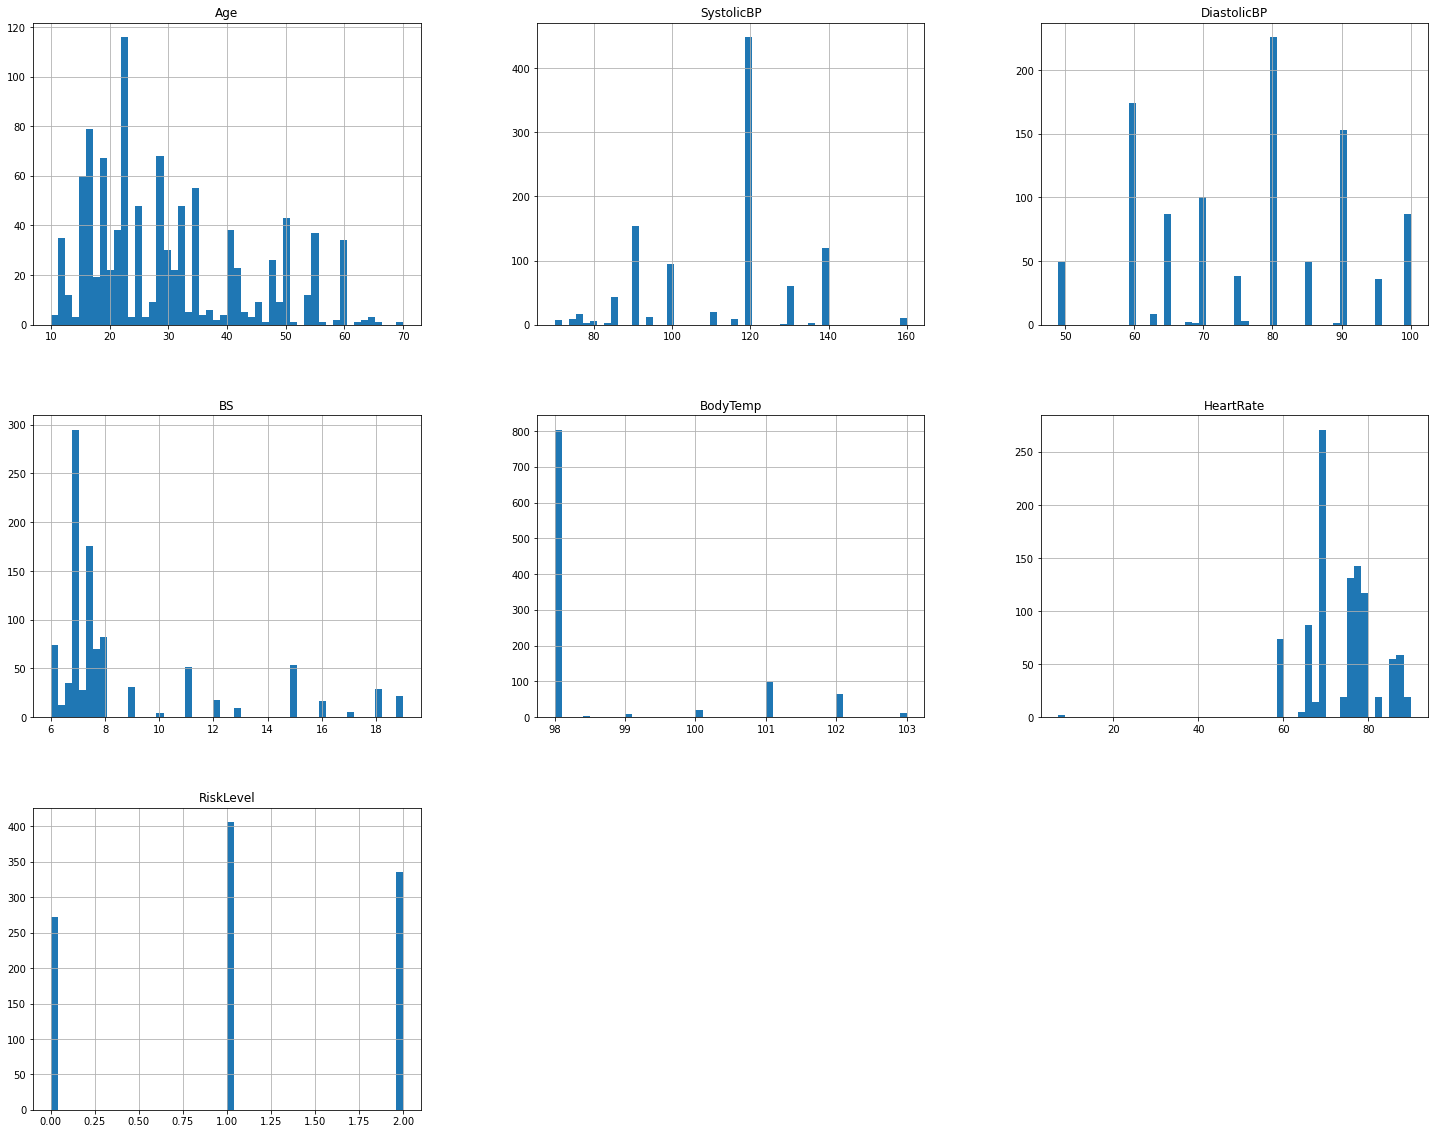

In [ ]:
Pregnency_dataset.hist(bins=50, figsize=(25, 20))
plt.show()

Removing buplicate data points

In [ ]:
Pregnency_dataset.drop_duplicates(keep='first', inplace=True)

Creating a test set


In [ ]:
original_train_Pregnency_dataset, test_Pregnency_dataset = train_test_split(Pregnency_dataset, test_size=0.2)

# To be sure we will create a copy for further processing
train_Pregnency_dataset = original_train_Pregnency_dataset.copy()

Gaining further insight
To further improve our understanding of the dataset
A 'total positive linear correlation' means that as X increases, Y increases. A 'total negative linear correlation' means that as X increases, Y decreases.

In [ ]:
correlation_matrix = train_Pregnency_dataset.corr(method='pearson')

correlation_matrix

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.343443,0.325432,0.363744,-0.168161,0.078423,-0.166608
SystolicBP,0.343443,1.000000,0.789568,0.333619,-0.147221,-0.044570,-0.151509
DiastolicBP,0.325432,0.789568,1.000000,0.288876,-0.159103,-0.053186,-0.179030
BS,0.363744,0.333619,0.288876,1.000000,-0.018510,0.144517,-0.404675
BodyTemp,-0.168161,-0.147221,-0.159103,-0.018510,1.000000,0.110191,-0.097830
HeartRate,0.078423,-0.044570,-0.053186,0.144517,0.110191,1.000000,-0.152707
RiskLevel,-0.166608,-0.151509,-0.179030,-0.404675,-0.097830,-0.152707,1.000000


In [ ]:
#Let's take a look at how each attribute correlates with the final diagnosis

correlation_matrix["RiskLevel"].sort_values()


BS            -0.404675
DiastolicBP   -0.179030
Age           -0.166608
HeartRate     -0.152707
SystolicBP    -0.151509
BodyTemp      -0.097830
RiskLevel      1.000000
Name: RiskLevel, dtype: float64

Handling missing data


In [ ]:
names = ['Age', 'SystolicBP', 'DiastolicBP', 'BodyTemp', 'HeartRate', 'BS']

for name in names:
    train_Pregnency_dataset[name].replace(0, np.nan, inplace=True)

In [ ]:
train_Pregnency_dataset
#no missing data found

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
375,60,120,80,7.8,98.0,75,0
80,16,90,65,6.9,98.0,76,2
25,16,100,70,7.2,98.0,80,1
588,12,90,60,7.5,102.0,66,2
300,15,75,49,7.7,98.0,77,1
...,...,...,...,...,...,...,...
255,25,100,90,6.9,98.0,76,1
319,35,85,60,19.0,98.0,86,0
111,38,135,60,7.9,101.0,86,0
651,23,90,60,6.7,98.0,76,1


Rescaling or standardizing attributes


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
mm_scaler = MinMaxScaler()

temp1_Pregnency_dataset = train_Pregnency_dataset.copy()
column_names = temp1_Pregnency_dataset.columns.tolist()

# transform all attributes
temp1_Pregnency_dataset[column_names] = mm_scaler.fit_transform(temp1_Pregnency_dataset[column_names])

temp1_Pregnency_dataset.sort_index(inplace=True)
temp1_Pregnency_dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,0.250000,0.857143,0.607843,0.692308,0.0,0.951807,0.0
2,0.316667,0.285714,0.411765,0.153846,0.4,0.879518,0.0
3,0.333333,1.000000,0.705882,0.076923,0.0,0.759036,0.0
4,0.416667,0.714286,0.215686,0.007692,0.0,0.831325,0.5
5,0.216667,1.000000,0.607843,0.077692,0.0,0.759036,0.0


standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

temp2_Pregnency_dataset = train_Pregnency_dataset.copy()

# transform all attributes
temp2_Pregnency_dataset[column_names] = mm_scaler.fit_transform(temp2_Pregnency_dataset[column_names])
temp2_Pregnency_dataset.sort_index(inplace=True)
temp2_Pregnency_dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,0.250000,0.857143,0.607843,0.692308,0.0,0.951807,0.0
2,0.316667,0.285714,0.411765,0.153846,0.4,0.879518,0.0
3,0.333333,1.000000,0.705882,0.076923,0.0,0.759036,0.0
4,0.416667,0.714286,0.215686,0.007692,0.0,0.831325,0.5
5,0.216667,1.000000,0.607843,0.077692,0.0,0.759036,0.0


NORMALIZATION

In [ ]:
def normalize(x):
  return ((x-np.min(x))/(max(x)- min(x)))



In [ ]:
Pregnency_dataset=Pregnency_dataset.apply(normalize)

Install feature selection
auto selection

In [ ]:
pip install featurewiz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 111 kB 8.7 MB/s 
     |████████████████████████████████| 2.0 MB 48.6 MB/s 
     |████████████████████████████████| 69 kB 6.1 MB/s 
     |████████████████████████████████| 3.1 MB 40.3 MB/s 
     |████████████████████████████████| 96 kB 4.1 MB/s 
     |████████████████████████████████| 255.9 MB 43 kB/s 
     |████████████████████████████████| 26.7 MB 1.2 MB/s 
     |████████████████████████████████| 1.6 MB 14.0 MB/s 
     |████████████████████████████████| 120 kB 68.9 MB/s 
     |████████████████████████████████| 82 kB 437 kB/s 
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 6.0.1
    Uninstalling pyarrow-6.0.1:
      Successfully uninstalled pyarrow-6.0.1
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
  Attempting uninstall: xgbo

In [ ]:
from featurewiz import featurewiz
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model  import LinearRegression

In [ ]:
# separating the data and labels
X = Pregnency_dataset.drop(columns = 'RiskLevel', axis=1)
y = Pregnency_dataset['RiskLevel']

In [ ]:
X_scaled =  StandardScaler().fit_transform(X) 


In [ ]:
from sklearn import utils


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2,stratify=y, random_state=1)

In [107]:
print(X.shape, X_train.shape, X_test.shape)

(452, 6) (361, 6) (91, 6)


In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [109]:
classifier = svm.SVC(kernel='linear')

In [110]:
classifier.fit(X_train, Y_train)

ValueError: ignored

making prediction system

In [ ]:
input_data = (25,140,100,7.01,98,80)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('low risk')
else:
  print('high risk')
  



['high risk']
high risk


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
import pickle

In [ ]:
filename = 'Pregnency_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('Pregnency_model.sav', 'rb'))

In [ ]:
input_data = (25,140,100,7.9,98,80)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('low risk')
else:
  print('high risk')
  

['high risk']
high risk


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
for column in X.columns:
  print(column)

Age
SystolicBP
DiastolicBP
BS
BodyTemp
HeartRate


In [ ]:
input_data = (40,100,50,70.11,70,80)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('low risk')
else:
  print('high risk')
  

['high risk']
high risk


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
